# Aula 02 - FAST.AI: Criando o Modelo Cats

### Import inicial

In [7]:
from fastai.vision.all import *

### Pets dataset

In [8]:
path = untar_data(URLs.PETS)/'images'

### Checando se é gato

In [9]:
def is_cat(x): return x[0].isupper()

### Criando Dataloaders

In [10]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

### Mostrando parte dos dados

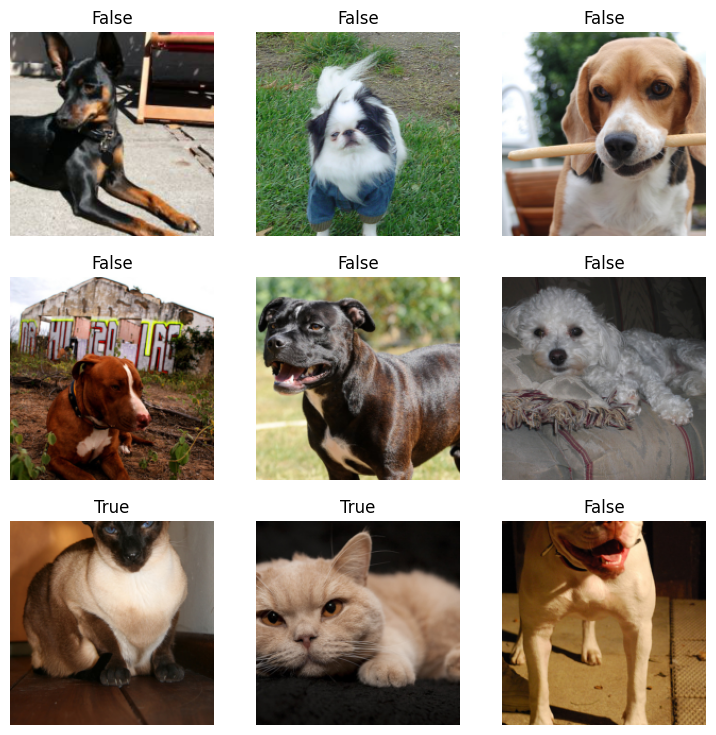

In [11]:
dls.show_batch()

### Treinando o modelo

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.209475,0.054510,0.016915,15:25


epoch,train_loss,valid_loss,error_rate,time
0,0.085599,0.073027,0.023004,21:55
1,0.044183,0.031554,0.012179,22:07
2,0.023723,0.021611,0.009472,22:01


### Exportando o modelo

In [14]:
learn.export('model.pkl')